In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from Utils_2 import *
from linUCB_1 import *
import seaborn as sns

In [2]:
data = pd.read_csv('sp_abtests_syntetic_data_batch1.csv')
dataExt2 = pd.read_csv('DataExtra/game1.csv')
dataExt3 = pd.read_csv('DataExtra/game3.csv')

In [3]:
#dataExt["NGU"] = (data.ab_test_datetime_start == data.register_date_alias) * 1
dataExt2["NGU"] = (dataExt2.ab_test_datetime_start == dataExt2.register_date_alias) * 1
dataExt3["NGU"] = (dataExt3.ab_test_datetime_start == dataExt3.register_date_alias) * 1

In [4]:
Check_ABTestId(dataExt2)

ID: 3495
	Total:  486295
	NGU: 324780
	Non-NGU: 161515
	Num Arms: 3
ID: 3552
	Total:  458911
	NGU: 441625
	Non-NGU: 17286
	Num Arms: 2
ID: 3582
	Total:  301515
	NGU: 289806
	Non-NGU: 11709
	Num Arms: 4
ID: 3473
	Total:  285731
	NGU: 277557
	Non-NGU: 8174
	Num Arms: 4
ID: 3457
	Total:  247844
	NGU: 240962
	Non-NGU: 6882
	Num Arms: 4
ID: 3454
	Total:  245962
	NGU: 239217
	Non-NGU: 6745
	Num Arms: 2
ID: 3565
	Total:  225935
	NGU: 190529
	Non-NGU: 35406
	Num Arms: 2
ID: 3420
	Total:  184148
	NGU: 175281
	Non-NGU: 8867
	Num Arms: 2
ID: 3507
	Total:  163803
	NGU: 134055
	Non-NGU: 29748
	Num Arms: 4
ID: 3526
	Total:  159849
	NGU: 154586
	Non-NGU: 5263
	Num Arms: 3

Unique A/B: [3420 3454 3457 3473 3495 3507 3526 3552 3565 3582]


In [5]:
#print("Number of cases: ",dataExt.shape[0])
print("Number of cases: ",dataExt2.shape[0])
print("Number of cases: ",dataExt3.shape[0])

Number of cases:  2759993
Number of cases:  4651007


In [6]:
Features_ALL = ["ab_test_id", "ab_test_experience_id", "country_alias", "platform_alias", "source_alias", "NGU",
            "return_d1", "converted_d1", "ad_revenue_d1", "time_played_d1", "num_sessions_d1", "num_impressions_d1", "num_transactions_d1", "iap_revenue_d1",
            "return_d3", "converted_d3", "ad_revenue_d3", "time_played_d3", "num_sessions_d3", "num_impressions_d3", "num_transactions_d3", "iap_revenue_d3", 
            "return_d7", "converted_d7", "ad_revenue_d7", "time_played_d7", "num_sessions_d7", "num_impressions_7", "num_transactions_d7", "iap_revenue_d7"]

data_big2 = dataExt2[Features_ALL].copy()
data_big3 = dataExt3[Features_ALL].copy()
print("\nDataExtra3 different A/B tests counts:")
print(data_big3.ab_test_id.value_counts())
print("\nDataExtra2 different A/B tests counts:")
print(data_big2.ab_test_id.value_counts())


DataExtra3 different A/B tests counts:
3350    1381702
3301     776402
3331     717633
3292     706119
3346     655856
3307     413295
Name: ab_test_id, dtype: int64

DataExtra2 different A/B tests counts:
3495    486295
3552    458911
3582    301515
3473    285731
3457    247844
3454    245962
3565    225935
3420    184148
3507    163803
3526    159849
Name: ab_test_id, dtype: int64


In [7]:
Test_ID_big = 3301
Test_ID_big2 = 3582
NGU = 1
DataDef = data_big3[(data_big3.ab_test_id == Test_ID_big) & (data_big3.NGU == NGU)]
DataDef2 = data_big2[(data_big2.ab_test_id == Test_ID_big2) & (data_big2.NGU == NGU)]
print("2 Arms data shape:", DataDef.shape)
print("4 Arms data shape:", DataDef2.shape)

Features_Dummie = ["country_alias", "platform_alias", "source_alias"]
DataDef_cat = CreateDummies(DataDef, Features_Dummie)
DataDef_cat2 = CreateDummies(DataDef2, Features_Dummie)

2 Arms data shape: (743103, 30)
4 Arms data shape: (289806, 30)


After some research has been done, we will use ID:3301 for 2 arms problem and ID:3582 for 4 arms bandit

### Exploration of ID == 3301

In [11]:
DataDef.keys()

Index(['ab_test_id', 'ab_test_experience_id', 'country_alias',
       'platform_alias', 'source_alias', 'NGU', 'return_d1', 'converted_d1',
       'ad_revenue_d1', 'time_played_d1', 'num_sessions_d1',
       'num_impressions_d1', 'num_transactions_d1', 'iap_revenue_d1',
       'return_d3', 'converted_d3', 'ad_revenue_d3', 'time_played_d3',
       'num_sessions_d3', 'num_impressions_d3', 'num_transactions_d3',
       'iap_revenue_d3', 'return_d7', 'converted_d7', 'ad_revenue_d7',
       'time_played_d7', 'num_sessions_d7', 'num_impressions_7',
       'num_transactions_d7', 'iap_revenue_d7'],
      dtype='object')

In [14]:
DataDef.groupby("ab_test_experience_id")

In [ ]:
# rename columns
grouped_single.columns = ['age_mean', 'age_min', 'age_max']

# reset index to get grouped columns back
grouped_single = grouped_single.reset_index()

print(grouped_single)

In [37]:
Actual_Dataset = DataDef_cat.sample(n=70000, random_state=32)
Actual_Dataset2 = DataDef_cat2.sample(n=140000, random_state=31)

In [ ]:
pd.pivot_table(Actual_Dataset,index = ["",”Status”],columns=[“Product”],aggfunc=[np.sum]

In [33]:
print(DataDef[DataDef["ab_test_experience_id"] == 0]["country_alias"].value_counts(normalize=True))
print("")
print(DataDef[DataDef["ab_test_experience_id"] == 1]["country_alias"].value_counts(normalize=True))

country_group3    0.570469
country_group1    0.274958
country_group2    0.154573
Name: country_alias, dtype: float64

country_group3    0.569258
country_group1    0.275581
country_group2    0.155161
Name: country_alias, dtype: float64


In [16]:
print(DataDef[DataDef["ab_test_experience_id"] == 0]["source_alias"].value_counts(normalize=True))
print("")
print(DataDef[DataDef["ab_test_experience_id"] == 1]["source_alias"].value_counts(normalize=True))

source2    0.778062
source1    0.221938
Name: source_alias, dtype: float64

source2    0.778698
source1    0.221302
Name: source_alias, dtype: float64


In [17]:
print(DataDef[DataDef["ab_test_experience_id"] == 0]["platform_alias"].value_counts(normalize=True))
print("")
print(DataDef[DataDef["ab_test_experience_id"] == 1]["platform_alias"].value_counts(normalize=True))

platform1    0.756794
platform2    0.243206
Name: platform_alias, dtype: float64

platform1    0.755214
platform2    0.244786
Name: platform_alias, dtype: float64


In [44]:
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Return day 1 day feature:")
print("AB Test 0:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 0]["return_d1"]))
print("AB Test 1:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 1]["return_d1"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Return day 3 day feature:")
print("AB Test 1:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 0]["return_d3"]))
print("AB Test 0:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 1]["return_d3"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Return day 7 feature:")
print("AB Test 0:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 0]["return_d7"]))
print("AB Test 1:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 1]["return_d7"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("")
print("Return percentage of 0s for day 1:")
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 0]["return_d1"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef[DataDef["ab_test_experience_id"] == 1]["return_d1"].value_counts(normalize=True)[0])
print("")
print("Return percentage of 0s for day 3:")
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 0]["return_d3"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef[DataDef["ab_test_experience_id"] == 1]["return_d3"].value_counts(normalize=True)[0])
print("")
print("Return percentage of 0s for day 7:")
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 0]["return_d7"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef[DataDef["ab_test_experience_id"] == 1]["return_d7"].value_counts(normalize=True)[0])

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Return day 1 day feature:
AB Test 0: 0.4425867075703076
AB Test 1: 0.44215927905383906
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Return day 3 day feature:
AB Test 1: 0.25650827251065794
AB Test 0: 0.2581368007205147
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Return day 7 feature:
AB Test 0: 0.16657309331993758
AB Test 1: 0.16732821710359555
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Num sessions percentage of 0s for day 1:
AB Test 0: 0.5574132924296924
AB Test 1: 0.557840720946161

Num sessions percentage of 0s for day 3:
AB Test 0: 0.743491727489342
AB Test 1: 0.7418631992794853

Num sessions percentage of 0s for day 7:
AB Test 0: 0.8334269066800625
AB Test 1: 0.8326717828964044


In [30]:
DataDef[DataDef["ab_test_experience_id"] == 0]["num_sessions_d1"][0]

0.3003003003003

In [59]:
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Num sessions day 1 feature:")
print("AB Test 0:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 0]["num_sessions_d1"]))
print("AB Test 1:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 1]["num_sessions_d1"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Num sessions day 3 feature:")
print("AB Test 1:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 0]["num_sessions_d3"]))
print("AB Test 0:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 1]["num_sessions_d3"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Num sessions day 7 feature:")
print("AB Test 0:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 0]["num_sessions_d7"]))
print("AB Test 1:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 1]["num_sessions_d7"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("")
print("Num sessions percentage of 0s for day 1:")
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 0]["num_sessions_d1"].value_counts(normalize=True)[0.3003003003003])
print("AB Test 1:", DataDef[DataDef["ab_test_experience_id"] == 1]["num_sessions_d1"].value_counts(normalize=True)[0.3003003003003])
print("")
print("Num sessions percentage of 0s for day 3:")
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 0]["num_sessions_d3"].value_counts(normalize=True)[0.3003003003003])
print("AB Test 1:", DataDef[DataDef["ab_test_experience_id"] == 1]["num_sessions_d3"].value_counts(normalize=True)[0.3003003003003])
print("")
print("Num sessions percentage of 0s for day 7:")
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 0]["num_sessions_d7"].value_counts(normalize=True)[0.3003003003003])
print("AB Test 1:", DataDef[DataDef["ab_test_experience_id"] == 1]["num_sessions_d7"].value_counts(normalize=True)[0.3003003003003])

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Num sessions day 1 feature:
AB Test 0: 1.3516566878860172
AB Test 1: 1.3483260472542722
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Num sessions day 3 feature:
AB Test 1: 2.1055572048618663
AB Test 0: 2.099703560692249
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Num sessions day 7 feature:
AB Test 0: 3.070706237614518
AB Test 1: 3.045870655076956
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Num sessions percentage of 0s for day 1:
AB Test 0: 0.38641046373876115
AB Test 1: 0.38677510341219806

Num sessions percentage of 0s for day 3:
AB Test 0: 0.3497959742865816
AB Test 1: 0.35002399918025273

Num sessions percentage of 0s for day 7:
AB Test 0: 0.3285928807248756
AB Test 1: 0.3287833763880425


In [23]:
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Time played day 1 feature:")
print("AB Test 0:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 0]["time_played_d1"]))
print("AB Test 1:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 1]["time_played_d1"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Time played day 3 feature:")
print("AB Test 1:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 0]["time_played_d3"]))
print("AB Test 0:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 1]["time_played_d3"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Time played day 7 feature:")
print("AB Test 0:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 0]["time_played_d7"]))
print("AB Test 1:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 1]["time_played_d7"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("")
print("Time played percentage of 0s for day 1:")
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 0]["time_played_d1"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef[DataDef["ab_test_experience_id"] == 1]["time_played_d1"].value_counts(normalize=True)[0])
print("")
print("Time played percentage of 0s for day 3:")
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 0]["time_played_d3"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef[DataDef["ab_test_experience_id"] == 1]["time_played_d3"].value_counts(normalize=True)[0])
print("")
print("Time played percentage of 0s for day 7:")
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 0]["time_played_d7"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef[DataDef["ab_test_experience_id"] == 1]["time_played_d1"].value_counts(normalize=True)[0])

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Time played day 1 feature:
AB Test 0: 102.858849404227
AB Test 1: 104.96843329133802
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Time played day 3 feature:
AB Test 1: 145.85781035437583
AB Test 0: 152.00826829957455
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Time played day 7 feature:
AB Test 0: 196.0851455225761
AB Test 1: 203.7008269569697
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Time played percentage of 0s for day 1:
AB Test 0: 0.11352372151497488
AB Test 0: 0.11313591086326939

Time played percentage of 0s for day 3:
AB Test 0: 0.10855135027682489
AB Test 0: 0.10813113799258992

Time played percentage of 0s for day 7:
AB Test 0: 0.10520957295631782
AB Test 0: 0.11313591086326939


In [46]:
print("Ad revenue mean day 1:")
print("AB Test 0:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 0]["ad_revenue_d1"]))
print("AB Test 1:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 1]["ad_revenue_d1"]))
print("")
print("Ad revenue mean day 3:")
print("AB Test 1:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 0]["ad_revenue_d3"]))
print("AB Test 0:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 1]["ad_revenue_d3"]))
print("")
print("Ad revenue mean day 7:")
print("AB Test 0:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 0]["ad_revenue_d7"]))
print("AB Test 1:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 1]["ad_revenue_d7"]))
print("")
print("Ad revenue percentage of 0s for day 1:")
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 0]["ad_revenue_d1"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef[DataDef["ab_test_experience_id"] == 1]["ad_revenue_d1"].value_counts(normalize=True)[0])
print("")
print("Ad revenue percentage of 0s for day 3:")
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 0]["ad_revenue_d3"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef[DataDef["ab_test_experience_id"] == 1]["ad_revenue_d3"].value_counts(normalize=True)[0])
print("")
print("Ad revenue percentage of 0s for day 7:")
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 0]["ad_revenue_d7"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef[DataDef["ab_test_experience_id"] == 1]["ad_revenue_d7"].value_counts(normalize=True)[0])

Ad revenue mean day 1:
AB Test 0: 0.007929684235468842
AB Test 1: 0.05428578918335112

Ad revenue mean day 3:
AB Test 1: 0.02433530337063356
AB Test 0: 0.15220360470976513

Ad revenue mean day 7:
AB Test 0: 0.05845039761040897
AB Test 1: 0.2588955400869937

Ad revenue percentage of 0s for day 1:
AB Test 0: 0.9374088331448435
AB Test 1: 0.8482254089298523

Ad revenue percentage of 0s for day 3:
AB Test 0: 0.8520162146044266
AB Test 1: 0.7365941657723152

Ad revenue percentage of 0s for day 7:
AB Test 0: 0.7901315489030428
AB Test 1: 0.7000453018233984


In [47]:
print("IAP revenue mean day 1:")
print("AB Test 0:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 0]["iap_revenue_d1"]))
print("AB Test 1:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 1]["iap_revenue_d1"]))
print("")
print("IAP revenue mean day 3:")
print("AB Test 1:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 0]["iap_revenue_d3"]))
print("AB Test 0:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 1]["iap_revenue_d3"]))
print("")
print("IAP revenue mean day 7:")
print("AB Test 0:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 0]["iap_revenue_d7"]))
print("AB Test 1:", np.mean(DataDef[DataDef["ab_test_experience_id"] == 1]["iap_revenue_d7"]))
print("")
print("IAP revenue percentage of 0s for day 1:")
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 0]["iap_revenue_d1"].value_counts(normalize=True)[0])
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 1]["iap_revenue_d1"].value_counts(normalize=True)[0])
print("")
print("IAP revenue percentage of 0s for day 3:")
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 0]["iap_revenue_d3"].value_counts(normalize=True)[0])
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 1]["iap_revenue_d3"].value_counts(normalize=True)[0])
print("")
print("IAP revenue percentage of 0s for day 7:")
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 0]["iap_revenue_d7"].value_counts(normalize=True)[0])
print("AB Test 0:", DataDef[DataDef["ab_test_experience_id"] == 1]["iap_revenue_d7"].value_counts(normalize=True)[0])

IAP revenue mean day 1:
AB Test 0: 0.45631655743682836
AB Test 1: 0.44433116907871734

IAP revenue mean day 3:
AB Test 1: 0.7203874355390374
AB Test 0: 0.6149436670806494

IAP revenue mean day 7:
AB Test 0: 0.9936492000038658
AB Test 1: 0.8168638725227197

IAP revenue percentage of 0s for day 1:
AB Test 0: 0.991234550324104
AB Test 0: 0.9912632197731673

IAP revenue percentage of 0s for day 3:
AB Test 0: 0.9887094131205054
AB Test 0: 0.9889873424548196

IAP revenue percentage of 0s for day 7:
AB Test 0: 0.9862514338212579
AB Test 0: 0.9867734854899338


### Exploration of ID == 3582

In [35]:
print(DataDef2["ab_test_experience_id"].value_counts(normalize=True))

Series([], Name: ab_test_experience_id, dtype: float64)


In [39]:
print(DataDef2[DataDef2["ab_test_experience_id"] == 0]["country_alias"].value_counts(normalize=True))
print("")
print(DataDef2[DataDef2["ab_test_experience_id"] == 1]["country_alias"].value_counts(normalize=True))
print("")
print(DataDef2[DataDef2["ab_test_experience_id"] == 2]["country_alias"].value_counts(normalize=True))
print("")
print(DataDef2[DataDef2["ab_test_experience_id"] == 3]["country_alias"].value_counts(normalize=True))

country_group3    0.761722
country_group2    0.121034
country_group1    0.117243
Name: country_alias, dtype: float64

country_group3    0.762387
country_group2    0.121300
country_group1    0.116312
Name: country_alias, dtype: float64

country_group3    0.762476
country_group2    0.120607
country_group1    0.116917
Name: country_alias, dtype: float64

country_group3    0.762405
country_group2    0.120156
country_group1    0.117439
Name: country_alias, dtype: float64


In [41]:
print(DataDef2[DataDef2["ab_test_experience_id"] == 0]["source_alias"].value_counts(normalize=True))
print("")
print(DataDef2[DataDef2["ab_test_experience_id"] == 1]["source_alias"].value_counts(normalize=True))
print("")
print(DataDef2[DataDef2["ab_test_experience_id"] == 2]["source_alias"].value_counts(normalize=True))
print("")
print(DataDef2[DataDef2["ab_test_experience_id"] == 3]["source_alias"].value_counts(normalize=True))



source1    0.748661
source2    0.251339
Name: source_alias, dtype: float64

source1    0.749675
source2    0.250325
Name: source_alias, dtype: float64

source1    0.749811
source2    0.250189
Name: source_alias, dtype: float64

source1    0.751027
source2    0.248973
Name: source_alias, dtype: float64


In [42]:
print(DataDef2[DataDef2["ab_test_experience_id"] == 0]["platform_alias"].value_counts(normalize=True))
print("")
print(DataDef2[DataDef2["ab_test_experience_id"] == 1]["platform_alias"].value_counts(normalize=True))
print("")
print(DataDef2[DataDef2["ab_test_experience_id"] == 2]["platform_alias"].value_counts(normalize=True))
print("")
print(DataDef2[DataDef2["ab_test_experience_id"] == 3]["platform_alias"].value_counts(normalize=True))

platform1    0.806536
platform2    0.193464
Name: platform_alias, dtype: float64

platform1    0.808149
platform2    0.191851
Name: platform_alias, dtype: float64

platform1    0.807299
platform2    0.192701
Name: platform_alias, dtype: float64

platform1    0.809968
platform2    0.190032
Name: platform_alias, dtype: float64


In [52]:
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Return day 1 day feature:")
print("AB Test 0:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 0]["return_d1"]))
print("AB Test 1:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 1]["return_d1"]))
print("AB Test 2:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 2]["return_d1"]))
print("AB Test 3:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 3]["return_d1"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Return day 3 day feature:")
print("AB Test 0:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 0]["return_d3"]))
print("AB Test 1:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 1]["return_d3"]))
print("AB Test 2:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 2]["return_d3"]))
print("AB Test 3:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 3]["return_d3"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Return day 7 feature:")
print("AB Test 0:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 0]["return_d7"]))
print("AB Test 1:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 1]["return_d7"]))
print("AB Test 2:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 2]["return_d7"]))
print("AB Test 3:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 3]["return_d7"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("")
print("Return percentage of 0s for day 1:")
print("AB Test 0:", DataDef2[DataDef2["ab_test_experience_id"] == 0]["return_d1"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef2[DataDef2["ab_test_experience_id"] == 1]["return_d1"].value_counts(normalize=True)[0])
print("AB Test 2:", DataDef2[DataDef2["ab_test_experience_id"] == 2]["return_d1"].value_counts(normalize=True)[0])
print("AB Test 3:", DataDef2[DataDef2["ab_test_experience_id"] == 3]["return_d1"].value_counts(normalize=True)[0])
print("")
print("Return percentage of 0s for day 3:")
print("AB Test 0:", DataDef2[DataDef2["ab_test_experience_id"] == 0]["return_d3"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef2[DataDef2["ab_test_experience_id"] == 1]["return_d3"].value_counts(normalize=True)[0])
print("AB Test 2:", DataDef2[DataDef2["ab_test_experience_id"] == 2]["return_d3"].value_counts(normalize=True)[0])
print("AB Test 3:", DataDef2[DataDef2["ab_test_experience_id"] == 3]["return_d3"].value_counts(normalize=True)[0])

print("")
print("Return percentage of 0s for day 7:")
print("AB Test 0:", DataDef2[DataDef2["ab_test_experience_id"] == 0]["return_d7"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef2[DataDef2["ab_test_experience_id"] == 1]["return_d7"].value_counts(normalize=True)[0])
print("AB Test 2:", DataDef2[DataDef2["ab_test_experience_id"] == 2]["return_d7"].value_counts(normalize=True)[0])
print("AB Test 3:", DataDef2[DataDef2["ab_test_experience_id"] == 3]["return_d7"].value_counts(normalize=True)[0])

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Return day 1 day feature:
AB Test 0: 0.27614593854199815
AB Test 1: 0.27905048774421753
AB Test 2: 0.2779559752756708
AB Test 3: 0.27518823951237004
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Return day 3 day feature:
AB Test 0: 0.14130359588804184
AB Test 1: 0.14325586536601542
AB Test 2: 0.1428945086108396
AB Test 3: 0.14295170587748574
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Return day 7 feature:
AB Test 0: 0.08936452813481467
AB Test 1: 0.09035012573576146
AB Test 2: 0.08990790325023058
AB Test 3: 0.09016189977107869
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Return percentage of 0s for day 1:
AB Test 0: 0.7238540614580019
AB Test 1: 0.7209495122557824
AB Test 2: 0.7220440247243293
AB Test 3: 0.72481176048763

Return percentage of 0s for day 3:
AB Test 0: 0.8586964041119581
AB Test 1: 0.8567441346339846
AB Test 2: 0.8571054913891604
AB Test 3: 0.8570482941225143

Return percentage of 0s for day 7:
AB Test 0: 0.9106354718651853
AB T

In [55]:
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Num sessions day 1 feature:")
print("AB Test 0:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 0]["num_sessions_d1"]))
print("AB Test 1:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 1]["num_sessions_d1"]))
print("AB Test 2:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 2]["num_sessions_d1"]))
print("AB Test 3:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 3]["num_sessions_d1"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Num sessions day 3 feature:")
print("AB Test 0:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 0]["num_sessions_d3"]))
print("AB Test 1:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 1]["num_sessions_d3"]))
print("AB Test 2:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 2]["num_sessions_d3"]))
print("AB Test 3:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 3]["num_sessions_d3"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Num sessions day 7 feature:")
print("AB Test 0:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 0]["num_sessions_d7"]))
print("AB Test 1:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 1]["num_sessions_d7"]))
print("AB Test 2:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 2]["num_sessions_d7"]))
print("AB Test 3:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 3]["num_sessions_d7"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Num sessions percentage of 0s for day 1:")
print("AB Test 0:", DataDef2[DataDef2["ab_test_experience_id"] == 0]["num_sessions_d1"].value_counts(normalize=True)[0.3003003003003])
print("AB Test 1:", DataDef2[DataDef2["ab_test_experience_id"] == 1]["num_sessions_d1"].value_counts(normalize=True)[0.3003003003003])
print("AB Test 2:", DataDef2[DataDef2["ab_test_experience_id"] == 2]["num_sessions_d1"].value_counts(normalize=True)[0.3003003003003])
print("AB Test 3:", DataDef2[DataDef2["ab_test_experience_id"] == 3]["num_sessions_d1"].value_counts(normalize=True)[0.3003003003003])
print("")
print("Num sessions percentage of 0s for day 3:")
print("AB Test 0:", DataDef2[DataDef2["ab_test_experience_id"] == 0]["num_sessions_d3"].value_counts(normalize=True)[0.3003003003003])
print("AB Test 1:", DataDef2[DataDef2["ab_test_experience_id"] == 1]["num_sessions_d3"].value_counts(normalize=True)[0.3003003003003])
print("AB Test 2:", DataDef2[DataDef2["ab_test_experience_id"] == 2]["num_sessions_d3"].value_counts(normalize=True)[0.3003003003003])
print("AB Test 3:", DataDef2[DataDef2["ab_test_experience_id"] == 3]["num_sessions_d3"].value_counts(normalize=True)[0.3003003003003])
print("")
print("Num sessions percentage of 0s for day 7:")
print("AB Test 0:", DataDef2[DataDef2["ab_test_experience_id"] == 0]["num_sessions_d7"].value_counts(normalize=True)[0.3003003003003])
print("AB Test 1:", DataDef2[DataDef2["ab_test_experience_id"] == 1]["num_sessions_d7"].value_counts(normalize=True)[0.3003003003003])
print("AB Test 2:", DataDef2[DataDef2["ab_test_experience_id"] == 2]["num_sessions_d7"].value_counts(normalize=True)[0.3003003003003])
print("AB Test 3:", DataDef2[DataDef2["ab_test_experience_id"] == 3]["num_sessions_d7"].value_counts(normalize=True)[0.3003003003003])

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Num sessions day 1 feature:
AB Test 0: 0.6869966110113819
AB Test 1: 0.6897313761659432
AB Test 2: 0.6925290952220144
AB Test 3: 0.6881015665528359
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Num sessions day 3 feature:
AB Test 0: 0.9031071277709877
AB Test 1: 0.909855056372154
AB Test 2: 0.911814748353723
AB Test 3: 0.9036921191819502
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Num sessions day 7 feature:
AB Test 0: 1.1807925639436772
AB Test 1: 1.1953714567914597
AB Test 2: 1.1977492835411945
AB Test 3: 1.18248264537272
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Num sessions percentage of 0s for day 1:
AB Test 0: 0.531054138937698
AB Test 1: 0.5304391079669495
AB Test 2: 0.5297008576423783
AB Test 3: 0.5308216344430041

Num sessions percentage of 0s for day 3:
AB Test 0: 0.47597437635762413
AB Test 1: 0.4753502639069279
AB Test 2: 0.47522748860836167
AB Test 3: 0.47476349394599665

Num sessions percentage of 0s for day 7:
AB Test 0: 0.4370

In [61]:
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Time played day 1 feature:")
print("AB Test 0:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 0]["time_played_d1"]))
print("AB Test 1:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 1]["time_played_d1"]))
print("AB Test 2:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 2]["time_played_d1"]))
print("AB Test 3:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 3]["time_played_d1"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Time played day 3 feature:")
print("AB Test 0:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 0]["time_played_d3"]))
print("AB Test 1:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 1]["time_played_d3"]))
print("AB Test 2:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 2]["time_played_d3"]))
print("AB Test 3:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 3]["time_played_d3"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Time played day 7 feature:")
print("AB Test 0:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 0]["time_played_d7"]))
print("AB Test 1:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 1]["time_played_d7"]))
print("AB Test 2:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 2]["time_played_d7"]))
print("AB Test 3:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 3]["time_played_d7"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Time played percentage of 0s for day 1:")
print("AB Test 0:", DataDef2[DataDef2["ab_test_experience_id"] == 0]["time_played_d1"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef2[DataDef2["ab_test_experience_id"] == 1]["time_played_d1"].value_counts(normalize=True)[0])
print("AB Test 2:", DataDef2[DataDef2["ab_test_experience_id"] == 2]["time_played_d1"].value_counts(normalize=True)[0])
print("AB Test 3:", DataDef2[DataDef2["ab_test_experience_id"] == 3]["time_played_d1"].value_counts(normalize=True)[0])
print("")
print("Time played percentage of 0s for day 3:")
print("AB Test 0:", DataDef2[DataDef2["ab_test_experience_id"] == 0]["time_played_d3"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef2[DataDef2["ab_test_experience_id"] == 1]["time_played_d3"].value_counts(normalize=True)[0])
print("AB Test 2:", DataDef2[DataDef2["ab_test_experience_id"] == 2]["time_played_d3"].value_counts(normalize=True)[0])
print("AB Test 3:", DataDef2[DataDef2["ab_test_experience_id"] == 3]["time_played_d3"].value_counts(normalize=True)[0])
print("")
print("Time played percentage of 0s for day 7:")
print("AB Test 0:", DataDef2[DataDef2["ab_test_experience_id"] == 0]["time_played_d7"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef2[DataDef2["ab_test_experience_id"] == 1]["time_played_d7"].value_counts(normalize=True)[0])
print("AB Test 2:", DataDef2[DataDef2["ab_test_experience_id"] == 2]["time_played_d7"].value_counts(normalize=True)[0])
print("AB Test 3:", DataDef2[DataDef2["ab_test_experience_id"] == 3]["time_played_d7"].value_counts(normalize=True)[0])
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Time played day 1 feature:
AB Test 0: 54.423063956436465
AB Test 1: 54.15730218115301
AB Test 2: 54.96207830334042
AB Test 3: 53.919859674965245
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Time played day 3 feature:
AB Test 0: 73.85882174697132
AB Test 1: 74.0453021177423
AB Test 2: 74.95985016516283
AB Test 3: 73.45226220776824
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Time played day 7 feature:
AB Test 0: 99.29562376661711
AB Test 1: 100.13640557688804
AB Test 2: 101.51838988637185
AB Test 3: 98.53272609716733
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Time played percentage of 0s for day 1:
AB Test 0: 0.07245735157795703
AB Test 1: 0.07291292453090889
AB Test 2: 0.0711168623779959
AB Test 3: 0.07252392641420967

Time played percentage of 0s for day 3:
AB Test 0: 0.06844501016921012
AB Test 1: 0.06865725260452649
AB Test 2: 0.06715215924890902
AB Test 3: 0.06797308106020906

Time played percentage of 0s for day 7:
AB Test 0: 0.0652628083

In [57]:
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Ad Revenue day 1 feature:")
print("AB Test 0:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 0]["ad_revenue_d1"]))
print("AB Test 1:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 1]["ad_revenue_d1"]))
print("AB Test 2:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 2]["ad_revenue_d1"]))
print("AB Test 3:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 3]["ad_revenue_d1"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Ad Revenue day 3 feature:")
print("AB Test 0:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 0]["ad_revenue_d3"]))
print("AB Test 1:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 1]["ad_revenue_d3"]))
print("AB Test 2:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 2]["ad_revenue_d3"]))
print("AB Test 3:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 3]["ad_revenue_d3"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Ad Revenue day 7 feature:")
print("AB Test 0:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 0]["ad_revenue_d7"]))
print("AB Test 1:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 1]["ad_revenue_d7"]))
print("AB Test 2:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 2]["ad_revenue_d7"]))
print("AB Test 3:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 3]["ad_revenue_d7"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Ad Revenue percentage of 0s for day 1:")
print("AB Test 0:", DataDef2[DataDef2["ab_test_experience_id"] == 0]["ad_revenue_d1"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef2[DataDef2["ab_test_experience_id"] == 1]["ad_revenue_d1"].value_counts(normalize=True)[0])
print("AB Test 2:", DataDef2[DataDef2["ab_test_experience_id"] == 2]["ad_revenue_d1"].value_counts(normalize=True)[0])
print("AB Test 3:", DataDef2[DataDef2["ab_test_experience_id"] == 3]["ad_revenue_d1"].value_counts(normalize=True)[0])
print("")
print("Ad Revenue percentage of 0s for day 3:")
print("AB Test 0:", DataDef2[DataDef2["ab_test_experience_id"] == 0]["ad_revenue_d3"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef2[DataDef2["ab_test_experience_id"] == 1]["ad_revenue_d3"].value_counts(normalize=True)[0])
print("AB Test 2:", DataDef2[DataDef2["ab_test_experience_id"] == 2]["ad_revenue_d3"].value_counts(normalize=True)[0])
print("AB Test 3:", DataDef2[DataDef2["ab_test_experience_id"] == 3]["ad_revenue_d3"].value_counts(normalize=True)[0])
print("")
print("Ad Revenue percentage of 0s for day 7:")
print("AB Test 0:", DataDef2[DataDef2["ab_test_experience_id"] == 0]["ad_revenue_d7"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef2[DataDef2["ab_test_experience_id"] == 1]["ad_revenue_d7"].value_counts(normalize=True)[0])
print("AB Test 2:", DataDef2[DataDef2["ab_test_experience_id"] == 2]["ad_revenue_d7"].value_counts(normalize=True)[0])
print("AB Test 3:", DataDef2[DataDef2["ab_test_experience_id"] == 3]["ad_revenue_d7"].value_counts(normalize=True)[0])
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Ad Revenue day 1 feature:
AB Test 0: 0.3426467424820659
AB Test 1: 0.35423781783572167
AB Test 2: 0.35266047229851605
AB Test 3: 0.3542675137503725
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Ad Revenue day 3 feature:
AB Test 0: 0.4279977891421917
AB Test 1: 0.4454242523930018
AB Test 2: 0.44061688212464
AB Test 3: 0.4440488611769026
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Ad Revenue day 7 feature:
AB Test 0: 0.5270240447455635
AB Test 1: 0.5513151392778293
AB Test 2: 0.5449830267275836
AB Test 3: 0.5492366216172623
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Ad Revenue percentage of 0s for day 1:
AB Test 0: 0.3427784772472571
AB Test 1: 0.3444054494708044
AB Test 2: 0.3442133230544734
AB Test 3: 0.34269244559671236

Ad Revenue percentage of 0s for day 3:
AB Test 0: 0.3275869225341395
AB Test 1: 0.32789399508110645
AB Test 2: 0.32850594017152845
AB Test 3: 0.3272471522740436

Time played percentage of 0s for day 7:
AB Test 0: 0.3163385309

In [58]:
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("IAP Revenue day 1 feature:")
print("AB Test 0:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 0]["iap_revenue_d1"]))
print("AB Test 1:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 1]["iap_revenue_d1"]))
print("AB Test 2:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 2]["iap_revenue_d1"]))
print("AB Test 3:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 3]["iap_revenue_d1"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("IAP Revenue day 3 feature:")
print("AB Test 0:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 0]["iap_revenue_d3"]))
print("AB Test 1:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 1]["iap_revenue_d3"]))
print("AB Test 2:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 2]["iap_revenue_d3"]))
print("AB Test 3:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 3]["iap_revenue_d3"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("IAP Revenue day 7 feature:")
print("AB Test 0:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 0]["iap_revenue_d7"]))
print("AB Test 1:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 1]["iap_revenue_d7"]))
print("AB Test 2:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 2]["iap_revenue_d7"]))
print("AB Test 3:", np.mean(DataDef2[DataDef2["ab_test_experience_id"] == 3]["iap_revenue_d7"]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("IAP Revenue percentage of 0s for day 1:")
print("AB Test 0:", DataDef2[DataDef2["ab_test_experience_id"] == 0]["iap_revenue_d1"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef2[DataDef2["ab_test_experience_id"] == 1]["iap_revenue_d1"].value_counts(normalize=True)[0])
print("AB Test 2:", DataDef2[DataDef2["ab_test_experience_id"] == 2]["iap_revenue_d1"].value_counts(normalize=True)[0])
print("AB Test 3:", DataDef2[DataDef2["ab_test_experience_id"] == 3]["iap_revenue_d1"].value_counts(normalize=True)[0])
print("")
print("IAP Revenue percentage of 0s for day 3:")
print("AB Test 0:", DataDef2[DataDef2["ab_test_experience_id"] == 0]["iap_revenue_d3"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef2[DataDef2["ab_test_experience_id"] == 1]["iap_revenue_d3"].value_counts(normalize=True)[0])
print("AB Test 2:", DataDef2[DataDef2["ab_test_experience_id"] == 2]["iap_revenue_d3"].value_counts(normalize=True)[0])
print("AB Test 3:", DataDef2[DataDef2["ab_test_experience_id"] == 3]["iap_revenue_d3"].value_counts(normalize=True)[0])
print("")
print("IAP Revenue percentage of 0s for day 7:")
print("AB Test 0:", DataDef2[DataDef2["ab_test_experience_id"] == 0]["iap_revenue_d7"].value_counts(normalize=True)[0])
print("AB Test 1:", DataDef2[DataDef2["ab_test_experience_id"] == 1]["iap_revenue_d7"].value_counts(normalize=True)[0])
print("AB Test 2:", DataDef2[DataDef2["ab_test_experience_id"] == 2]["iap_revenue_d7"].value_counts(normalize=True)[0])
print("AB Test 3:", DataDef2[DataDef2["ab_test_experience_id"] == 3]["iap_revenue_d7"].value_counts(normalize=True)[0])
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IAP Revenue day 1 feature:
AB Test 0: 0.02062736797476583
AB Test 1: 0.018217318406966315
AB Test 2: 0.01849916950591708
AB Test 3: 0.01789251581286059
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IAP Revenue day 3 feature:
AB Test 0: 0.02922030392833563
AB Test 1: 0.02686283086124122
AB Test 2: 0.0273683353362387
AB Test 3: 0.024497776473551867
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IAP Revenue day 7 feature:
AB Test 0: 0.040874819982841364
AB Test 1: 0.04187258458988745
AB Test 2: 0.04401723487128112
AB Test 3: 0.03816444272786312
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IAP Revenue percentage of 0s for day 1:
AB Test 0: 0.9987686262573156
AB Test 1: 0.998604471218946
AB Test 2: 0.9984994699962831
AB Test 3: 0.9985382133105332

IAP Revenue percentage of 0s for day 3:
AB Test 0: 0.9984365704165917
AB Test 1: 0.9982037748362672
AB Test 2: 0.9981415454082405
AB Test 3: 0.9983175662630664

IAP Revenue percentage of 0s for day 7:
AB Test 

# Contextual Bandits first approach

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

#### Create extra features

In [9]:
data["NGU"] = (data.ab_test_datetime_start == data.register_date_alias) * 1
dataExt["NGU"] = (dataExt.ab_test_datetime_start == dataExt.register_date_alias) * 1
dataExt2["NGU"] = (dataExt2.ab_test_datetime_start == dataExt2.register_date_alias) * 1
dataExt3["NGU"] = (dataExt3.ab_test_datetime_start == dataExt3.register_date_alias) * 1

#### Extract features to work with 

In [10]:
Features = ["ab_test_id", "ab_test_experience_id", "country_alias", "platform_alias", "source_alias", "NGU",
            "return_d1", "converted_d1", "ad_revenue_d1", "time_played_d1", "num_sessions_d1", "num_impressions_d1", "num_transactions_d1",
            "return_d3", "converted_d3", "ad_revenue_d3", "time_played_d3", "num_sessions_d3", "num_impressions_d3", "num_transactions_d3",
            "return_d7", "converted_d7", "ad_revenue_d7", "time_played_d7", "num_sessions_d7", "num_impressions_7", "num_transactions_d7"]

data0 = data[Features].copy()
data_big = dataExt[Features].copy()
data_big2 = dataExt2[Features].copy()
data_big3 = dataExt3[Features].copy()

# First Lin-UCB implementation with small dataset

### UCB without features impact

In [398]:
Alpha = 1
ats = Data_big_cat.head(int(Data_big_cat.shape[0]/2))
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU", "return_d1", "ad_revenue_d1", "num_sessions_d1",
            "return_d1", "ad_revenue_d1", "num_sessions_d1", "time_played_d1",
            "return_d3", "ad_revenue_d3", "num_sessions_d3", "time_played_d3",
           ]
#Reward = "time_played_d3"
Reward = "converted_d7"
Arms = np.unique(ats.ab_test_experience_id).shape[0]
print("Number of Arms:", Arms)

Number of Arms: 3


In [399]:
Path_Algo, Times_Aligned, Arms_Rewards, Aligned_Reward, UCB_Object, Times_ArmsChosen, Mark_dic, Features_dic = LinUCB_Algorithm(Data = ats, Features = Features, Reward_Feature = Reward, Alpha = Alpha)

100%|███████████████████████████████████████████████████████████████████████████| 77293/77293 [05:36<00:00, 229.65it/s]


In [387]:
for k in range(len(np.unique(ats["ab_test_experience_id"]))):
    print(np.mean(ats[ats["ab_test_experience_id"] == k][Reward]))
    
np.mean(ats[Reward])

0.014052235401459858
0.011139534426100474
0.010740045739752537


0.011998563906175182

In [388]:
print(Times_Aligned/ats.shape[0])
print(np.mean([i / j for i, j in zip(Arms_Rewards, Times_ArmsChosen)]))
print([i / j for i, j in zip(Arms_Rewards, Times_ArmsChosen)])
print(Times_ArmsChosen)

0.3310843155266324
0.01786719180802691
[0.042069670227589416, 0.005863536316947907, 0.005668368879543404]
[10765, 20445, 19974]


<AxesSubplot:>

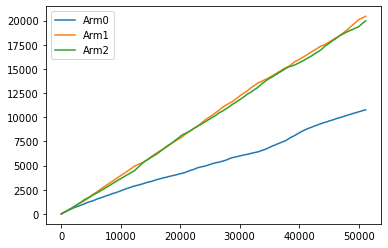

In [389]:
Path_Algo = pd.DataFrame(Path_Algo, columns = ["X"])
for i in range(len(np.unique(Path_Algo))):
    Path_Algo['Arm{}'.format(i)] = (Path_Algo["X"] == i).cumsum()
    
df = Path_Algo.loc[:, Path_Algo.columns != "X"]
df.plot()

0.01462718227313379


<AxesSubplot:>

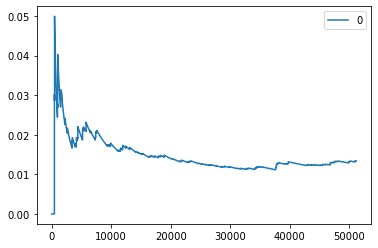

In [390]:
print(np.mean(Aligned_Reward))
pd.DataFrame(Aligned_Reward).plot()

### Run it multiple times with different alphas

In [44]:
Alphas = [1.3, 1.5, 2]
Times = 15
Feat_Mult = {}
Mark_Mult = {}
for x in range(Times):
        Feat_Mult["Feat{0}_Mult".format(x)] = {}
        Mark_Mult["Mark{0}_Mult".format(x)] = {}
        
Times_ArmsChosen_Mult = []
Mean_Reward = []
Mean_RewardArms = []

for k in tqdm(range(Times)):
    Times_Aligned, Arms_Rewards, Aligned_Reward, UCB_Object, Times_ArmsChosen, Mark_dic, Features_dic = LinUCB_Algorithm(Data = ats, Features = Features, Reward = Reward, Alpha = Alpha)
    Times_ArmsChosen_Mult.append(Times_ArmsChosen)
    
    for x in range(len(Mark_dic.keys())):
        Mark_Mult["Mark{0}_Mult".format(k)] = Mark_dic
        Feat_Mult["Feat{0}_Mult".format(k)] = Features_dic
    
    Mean_Reward.append(np.mean([i / j for i, j in zip(Arms_Rewards, Times_ArmsChosen)]))
    Mean_RewardArms.append([i / j for i, j in zip(Arms_Rewards, Times_ArmsChosen)])

100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [1:49:28<00:00, 437.93s/it]


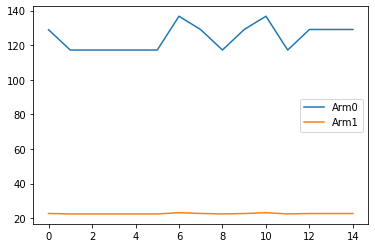

array([124.54476402,  22.69306449])

In [46]:
x = range(len(Mean_RewardArms))
for l in range(len(Mean_RewardArms[0])):
    plt.plot(x, np.array(Mean_RewardArms)[:,l], label = "Arm{}".format(l))
plt.legend()
plt.show()
np.mean(np.array(Mean_RewardArms), axis=0)

In [48]:
Extract_Mean_Feature(Mark_Mult, Feat_Mult, "source_alias_source2", Print = True)

Proportion source_alias_source2 equals 0 for arm 0 is: 82.521056795329
Proportion source_alias_source2 equals 0 for arm 1 is: 72.52139088884341


[82.521056795329, 72.52139088884341]

# TEST MULTIPLE RUNS

In [81]:
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
          "platform_alias_platform2", "source_alias_source2", 
          "NGU", "return_d1", "ad_revenue_d1", "num_sessions_d1"]
Reward = "time_played_d3"
Alpha = 1.5
Times = 15
ats = Data_big_cat.head(int(Data_big_cat.shape[0]/3))

In [105]:
def Multiple_Runs(Times, Data, Features, Reward, Alpha):
    Feat_Mult = {}
    Mark_Mult = {}
    
    for x in range(Times):
        Feat_Mult["Feat{0}_Mult".format(x)] = {}
        Mark_Mult["Mark{0}_Mult".format(x)] = {}
        
    Times_ArmsChosen_Mult = []
    Mean_Reward = []
    Mean_RewardArms = []

    for k in tqdm(range(Times)):
        Times_Aligned, Arms_Rewards, Aligned_Reward, UCB_Object, Times_ArmsChosen, Mark_dic, Features_dic = LinUCB_Algorithm(Data, Alpha, Features, Reward)
        for x in range(len(Mark_dic.keys())):
            Mark_Mult["Mark{0}_Mult".format(k)] = Mark_dic
            Feat_Mult["Feat{0}_Mult".format(k)] = Features_dic
    
        Mean_Reward.append(np.mean([i / j for i, j in zip(Arms_Rewards, Times_ArmsChosen)]))
        Mean_RewardArms.append([i / j for i, j in zip(Arms_Rewards, Times_ArmsChosen)])
        Times_ArmsChosen_Mult.append(Times_ArmsChosen)
        
    return Mean_Reward, Mean_RewardArms, Mark_Mult, Feat_Mult, Times_ArmsChosen_Mult

In [109]:
Mean_Reward, Mean_RewardArms, Mark_Mult, Feat_Mult, Times_ArmsChosen = Multiple_Runs(Times = 2, Data = Data0_cat, Features = Features, Reward = Reward, Alpha = Alpha)

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [1:06:18<00:00, 397.88s/it]


In [110]:
print(Times_ArmsChosen)
pd.DataFrame(Times_ArmsChosen).idxmax(axis=1).value_counts()

[[55973, 17277],
 [53219, 20101],
 [12950, 60886],
 [21180, 52699],
 [31082, 42816],
 [24906, 48871],
 [27428, 46289],
 [57655, 15681],
 [14630, 59260],
 [30798, 43044]]

0    0.767642
1    0.232358
Name: source_alias_source2, dtype: float64
Proportion source_alias_source2 equals 0 for arm 0 is: 79.69987884298256
Proportion source_alias_source2 equals 0 for arm 1 is: 75.88295314227447


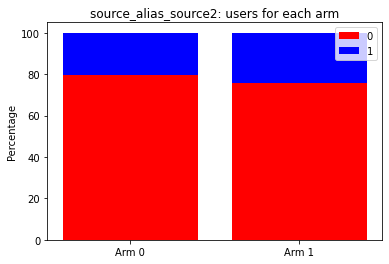

0    0.867106
1    0.132894
Name: platform_alias_platform2, dtype: float64
Proportion platform_alias_platform2 equals 0 for arm 0 is: 89.42845897216728
Proportion platform_alias_platform2 equals 0 for arm 1 is: 86.32859684950253


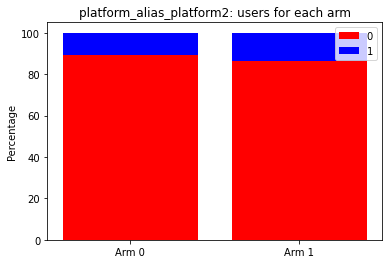

country_alias_country_group3    0.813944
country_alias_country_group2    0.103507
country_alias_country_group1    0.082550
dtype: float64
Proportion country for arm 0 is: [0.04538473 0.10572268 0.84889259]
Proportion country for arm 1 is: [0.08501417 0.10408396 0.81090187]


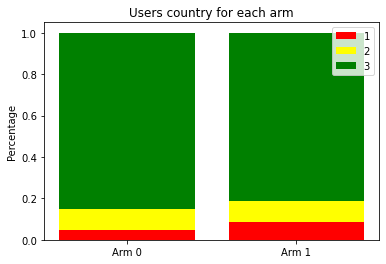

In [143]:
print(ats["source_alias_source2"].value_counts(normalize=True))
Plot1("source_alias_source2", Mark_Mult, Feat_Mult)
print(ats["platform_alias_platform2"].value_counts(normalize=True))
Plot1("platform_alias_platform2", Mark_Mult, Feat_Mult)
print(ats[['country_alias_country_group1', 'country_alias_country_group2', 'country_alias_country_group3']].idxmax(axis=1).value_counts(normalize = True))
Plot2_2arms()